In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_train=pd.read_csv('train.csv')

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

In [ ]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train['category']=data_train['category'].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
data_train['views']

0        1031602
1           1707
2           2023
3         620860
4            666
          ...   
14994     525949
14995     665673
14996       3479
14997        963
14998      15212
Name: views, Length: 14999, dtype: object

In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']


In [ ]:
data_train['views']=pd.to_numeric(data_train['views'])
data_train['comment']=pd.to_numeric(data_train['comment'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['adview']=pd.to_numeric(data_train['adview'])


In [ ]:
column_vidid=data_train['vidid']

In [ ]:
column_vidid

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14637, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
import datetime
import time

In [ ]:
import seaborn as sns

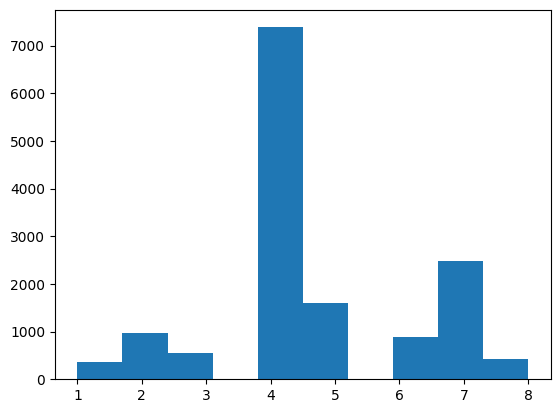

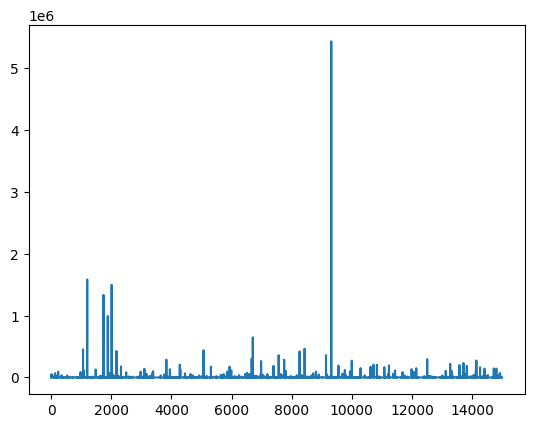

In [ ]:
plt.hist(data_train['category'])
plt.show()
plt.plot(data_train['adview'])
plt.show()



In [ ]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')

    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [ ]:
data_train=data_train[data_train["adview"]<2000000]

In [ ]:
Y_train=pd.DataFrame(data=data_train.iloc[:,1].values,columns=['target'])
data_train=data_train.drop(['adview'],axis=1)
data_train=data_train.drop(['vidid'],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
x_train.shape

(11708, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn import metrics
def print_errors(x_test,y_test,model_name):
    prediction=model_name.predict(x_test)
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error :', metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))


In [ ]:
from sklearn.linear_model import LinearRegression
LRmodel=LinearRegression()
LRmodel.fit(x_train,y_train)
print_errors(x_test,y_test,LRmodel)

Mean Absolute Error : 3707.3780058245316
Mean Squared Error : 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
print_errors(x_test,y_test,decision_tree)

Mean Absolute Error : 2812.3370901639346
Mean Squared Error : 1197476744.6861339
Root Mean Squared Error: 34604.57693262748


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators=200,max_depth=25,min_samples_split=15,min_samples_leaf=2,random_state=42)
random_forest.fit(x_train,y_train)
print_errors(x_test,y_test,random_forest)

<ipython-input-26-0ec387310058>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


Mean Absolute Error : 3416.0874288727396
Mean Squared Error : 713372984.2073203
Root Mean Squared Error: 26709.04311665471


In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
print_errors(x_test,y_test,svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error : 1696.9438599505638
Mean Squared Error : 833685776.029172
Root Mean Squared Error: 28873.617300732723


In [ ]:
import tensorflow

In [ ]:
import keras
from keras.layers import Dense

In [ ]:
ann = keras.models.Sequential([Dense(6,activation="relu",
                              input_shape=x_train.shape[1:]),
                               Dense(6,activation='relu'),
                               Dense(1)
                               ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=['mean_squared_error'])

history=ann.fit(x_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 3s 3ms/step - loss: 767405824.0000 - mean_squared_error: 767405824.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767396352.0000 - mean_squared_error: 767396352.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767375360.0000 - mean_squared_error: 767375360.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767339840.0000 - mean_squared_error: 767339840.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767281216.0000 - mean_squared_error: 767281216.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767194752.0000 - mean_squared_error: 767194752.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767089408.0000 - mean_squared_error: 767089408.0000
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - loss: 766961664.0000 - mean_squared_error:

In [ ]:
ann.summary()
print_errors(x_test,y_test,ann)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 48        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
92/92 [==============================] - 0s 2ms/step
Mean Absolute Error : 3307.137003497348
Mean Squared Error : 829645505.8770192
Root Mean Squared Error: 28803.567589398004


In [ ]:
import joblib
joblib.dump(decision_tree,"decision_tree_youtubeadview.pkl")

ann.save('ann_youtubeadcview.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
